In [171]:
pip install matplotlib scipy adjustText seaborn


Note: you may need to restart the kernel to use updated packages.


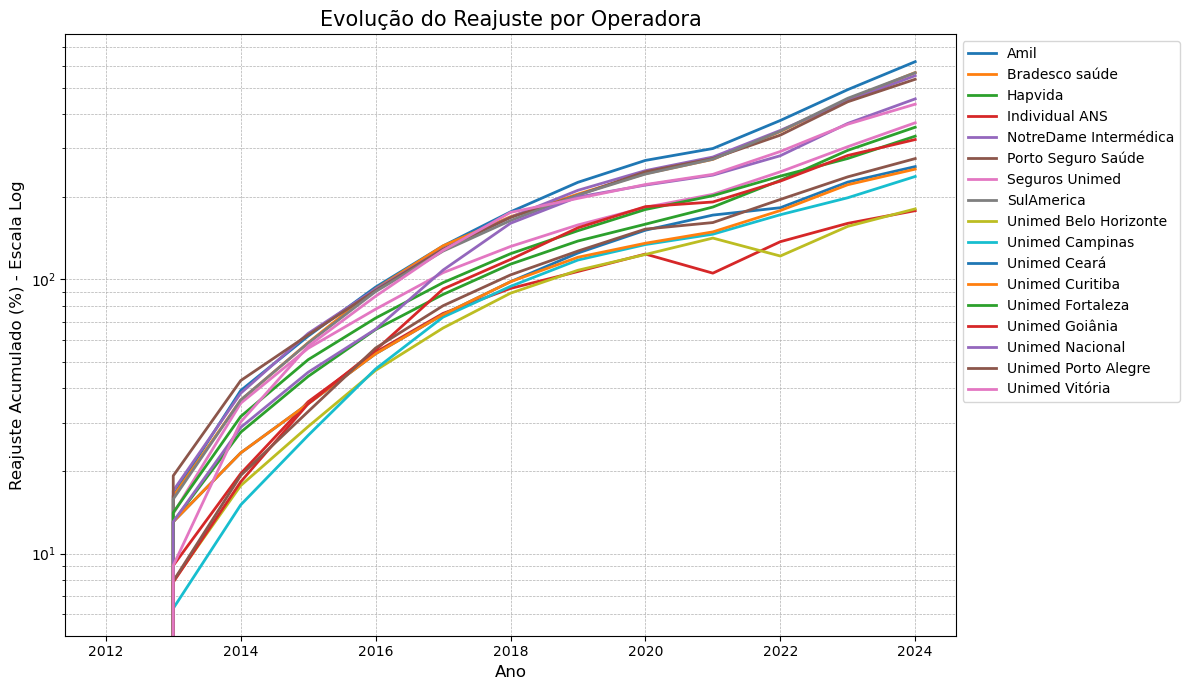

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Carregar o arquivo CSV com encoding padrão Brasil (ISO-8859-1)
df = pd.read_csv('plot_reajuste_pool_base.csv', sep=';', decimal=',', encoding='ISO-8859-1')

# Transformar dados para formato adequado
df_melted = df.melt(id_vars='Operadora', var_name='Ano', value_name='Reajuste')

# Remover o '%' e converter para float
df_melted['Reajuste'] = (
    df_melted['Reajuste']
    .str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

# Converter Ano para inteiro
df_melted['Ano'] = df_melted['Ano'].astype(int)

# Pivotar novamente para o gráfico
df_final = df_melted.pivot(index='Ano', columns='Operadora', values='Reajuste')

# Plotando o gráfico com escala logarítmica
plt.figure(figsize=(12, 7))

for coluna in df_final.columns:
    plt.plot(df_final.index, df_final[coluna], label=coluna, linewidth=2)

# Escala logarítmica
plt.yscale('log')

# Legendas e título
plt.title('Evolução do Reajuste por Operadora', fontsize=15)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Reajuste Acumulado (%) - Escala Log', fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Legenda fora do gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()

# Mostrar gráfico
plt.show()

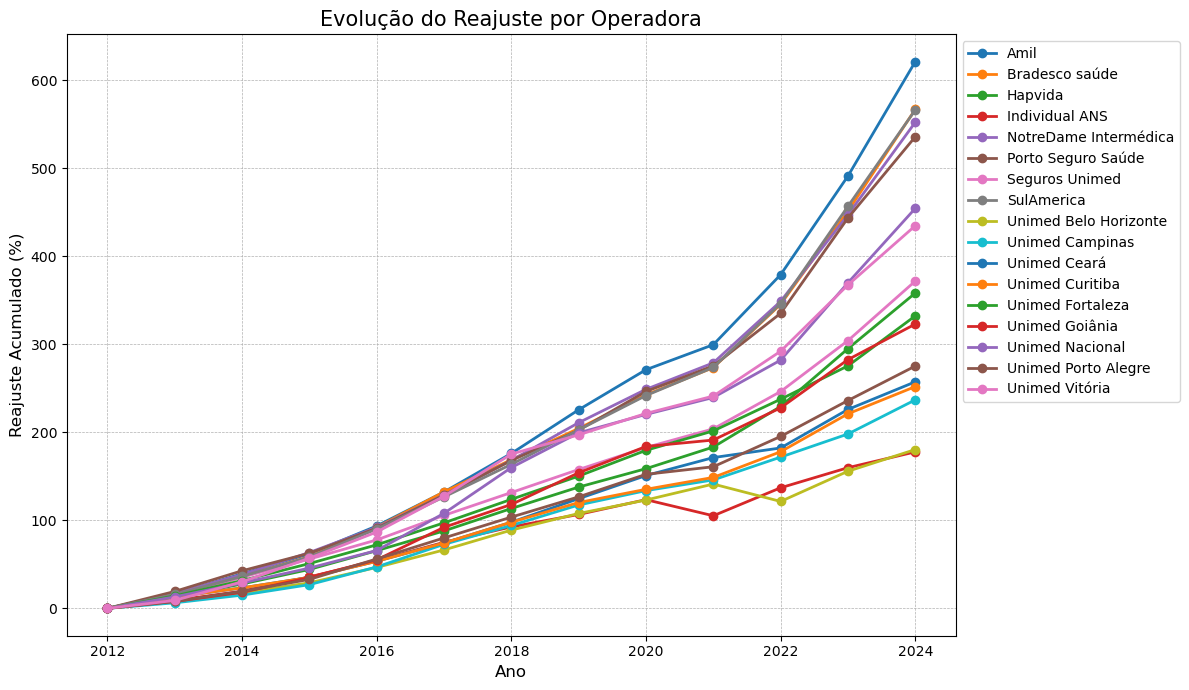

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV com encoding padrão Brasil (ISO-8859-1)
df = pd.read_csv('plot_reajuste_pool_base.csv', sep=';', decimal=',', encoding='ISO-8859-1')

# Transformar dados para formato adequado
df_melted = df.melt(id_vars='Operadora', var_name='Ano', value_name='Reajuste')

# Remover o '%' e converter para float
df_melted['Reajuste'] = (
    df_melted['Reajuste']
    .str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

# Converter Ano para inteiro
df_melted['Ano'] = df_melted['Ano'].astype(int)

# Pivotar novamente para o gráfico
df_final = df_melted.pivot(index='Ano', columns='Operadora', values='Reajuste')

# Plotando o gráfico SEM escala logarítmica
plt.figure(figsize=(12, 7))

for coluna in df_final.columns:
    plt.plot(df_final.index, df_final[coluna], label=coluna, linewidth=2, marker='o')

# Legendas e título
plt.title('Evolução do Reajuste por Operadora', fontsize=15)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Reajuste Acumulado (%)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Legenda fora do gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

plt.tight_layout()

# Mostrar gráfico
plt.show()


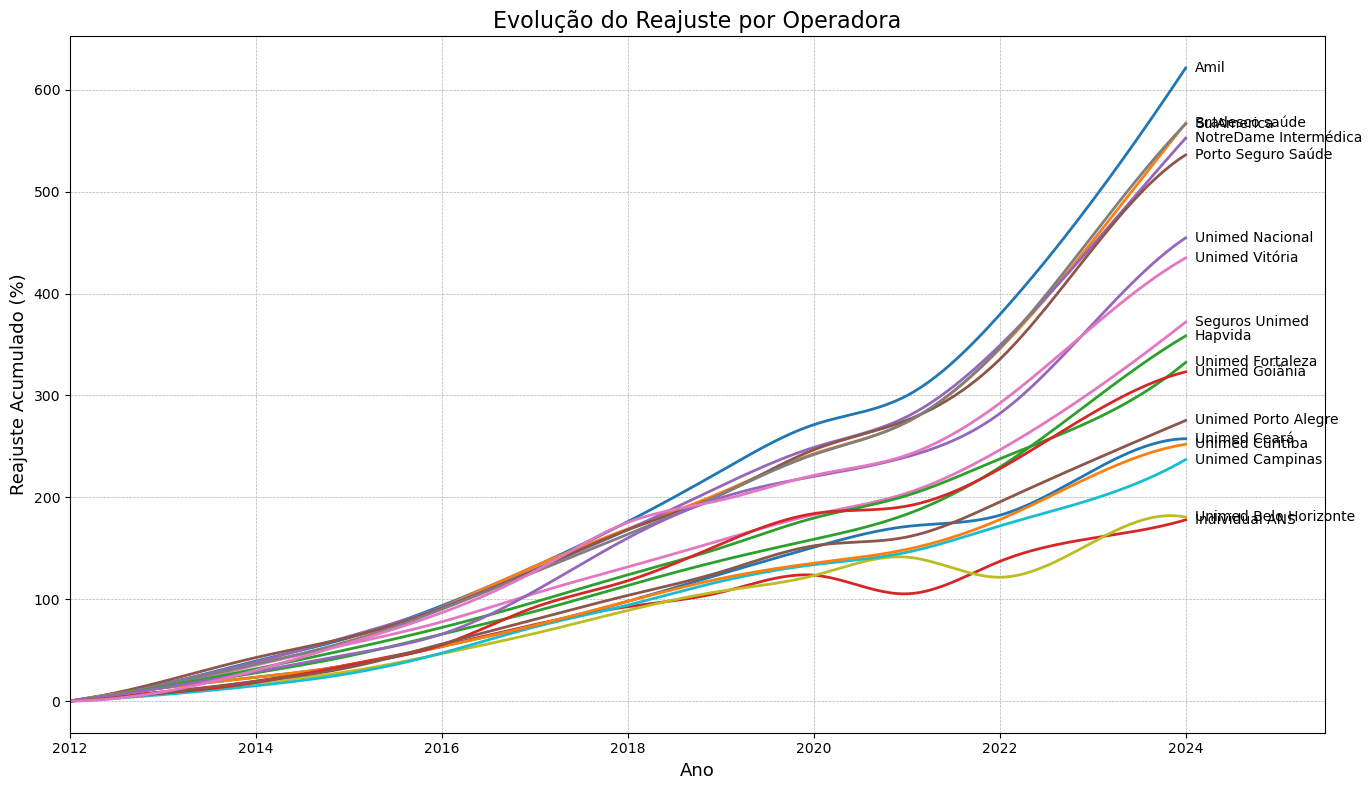

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Carregar o arquivo CSV com encoding padrão Brasil (ISO-8859-1)
df = pd.read_csv('plot_reajuste_pool_base.csv', sep=';', decimal=',', encoding='ISO-8859-1')

# Transformar dados para formato adequado
df_melted = df.melt(id_vars='Operadora', var_name='Ano', value_name='Reajuste')

# Remover o '%' e converter para float
df_melted['Reajuste'] = (
    df_melted['Reajuste']
    .str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

# Converter Ano para inteiro
df_melted['Ano'] = df_melted['Ano'].astype(int)

# Pivotar novamente para o gráfico
df_final = df_melted.pivot(index='Ano', columns='Operadora', values='Reajuste')

# Preparar o gráfico
plt.figure(figsize=(14, 8))

# Suavização das linhas
anos = df_final.index.values
anos_smooth = np.linspace(anos.min(), anos.max(), 300)

for coluna in df_final.columns:
    spl = make_interp_spline(anos, df_final[coluna].values, k=3)
    reajuste_smooth = spl(anos_smooth)
    plt.plot(anos_smooth, reajuste_smooth, linewidth=2)

    # Adicionar legenda no final da linha dentro do gráfico
    plt.text(anos_smooth[-1] + 0.1, reajuste_smooth[-1],
             coluna, fontsize=10, verticalalignment='center')

# Legendas e título
plt.title('Evolução do Reajuste por Operadora', fontsize=16)
plt.xlabel('Ano', fontsize=13)
plt.ylabel('Reajuste Acumulado (%)', fontsize=13)
plt.grid(True, linestyle='--', linewidth=0.5)

# Ajuste para a legenda ficar visível
plt.xlim(anos.min(), anos.max() + 1.5)

plt.tight_layout()

# Mostrar gráfico
plt.show()


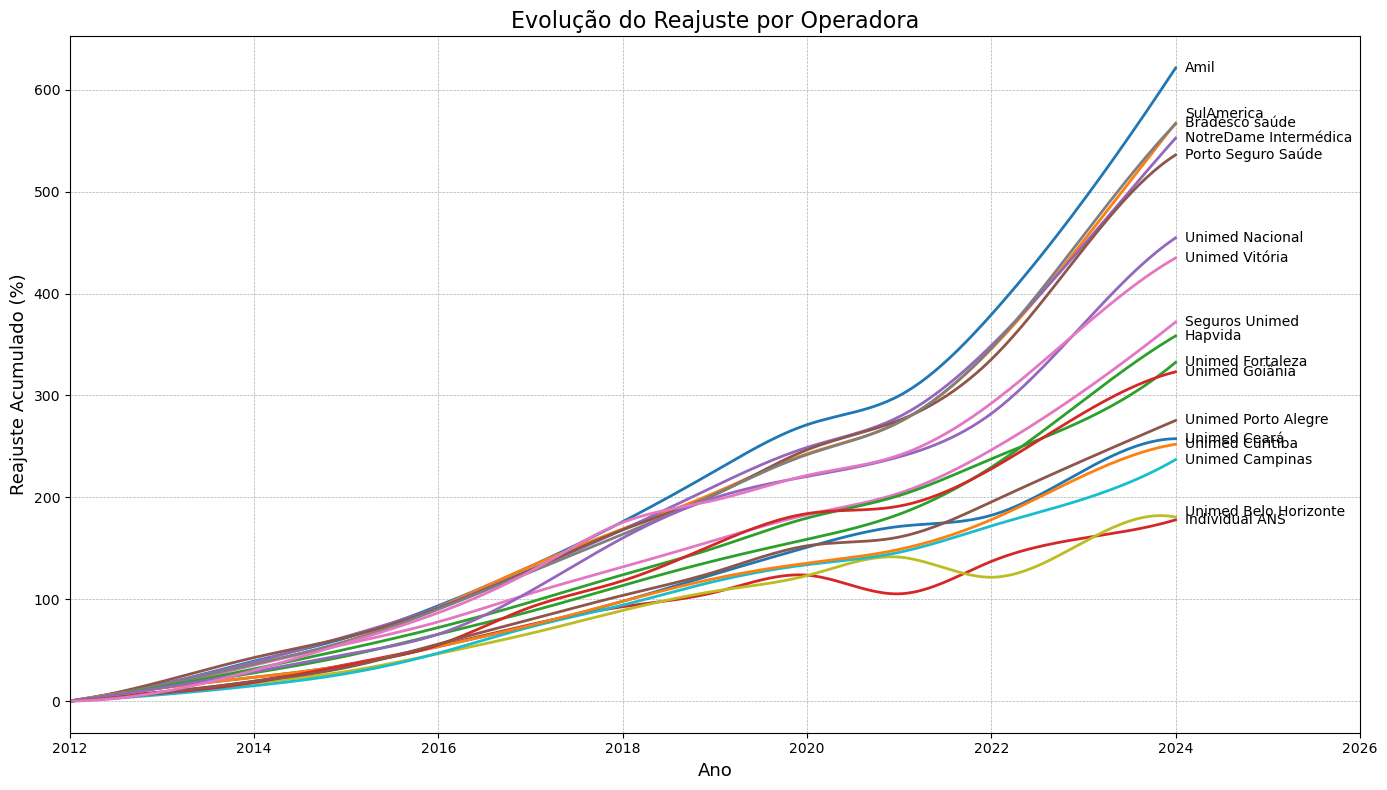

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Carregar o arquivo CSV com encoding padrão Brasil (ISO-8859-1)
df = pd.read_csv('plot_reajuste_pool_base.csv', sep=';', decimal=',', encoding='ISO-8859-1')

# Transformar dados para formato adequado
df_melted = df.melt(id_vars='Operadora', var_name='Ano', value_name='Reajuste')

# Remover o '%' e converter para float
df_melted['Reajuste'] = (
    df_melted['Reajuste']
    .str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

# Converter Ano para inteiro
df_melted['Ano'] = df_melted['Ano'].astype(int)

# Pivotar novamente para o gráfico
df_final = df_melted.pivot(index='Ano', columns='Operadora', values='Reajuste')

# Preparar o gráfico
plt.figure(figsize=(14, 8))

anos = df_final.index.values
anos_smooth = np.linspace(anos.min(), anos.max(), 300)

# Armazenar última posição das legendas para ajuste automático
ultimos_valores = []

for coluna in df_final.columns:
    spl = make_interp_spline(anos, df_final[coluna].values, k=3)
    reajuste_smooth = spl(anos_smooth)
    plt.plot(anos_smooth, reajuste_smooth, linewidth=2)

    # Último ponto da linha
    ultimo_ano = anos_smooth[-1]
    ultimo_reajuste = reajuste_smooth[-1]

    # Verificar sobreposição e ajustar posição da legenda
    offset = 0
    while any(abs(ultimo_reajuste + offset - pos) < 5 for pos in ultimos_valores):
        offset += 5 # Ajusta o offset para cima caso sobreponha (+5 unidades)

    plt.text(ultimo_ano + 0.1, ultimo_reajuste + offset,
             coluna, fontsize=10, verticalalignment='center')

    ultimos_valores.append(ultimo_reajuste + offset)

# Legendas e título
plt.title('Evolução do Reajuste por Operadora', fontsize=16)
plt.xlabel('Ano', fontsize=13)
plt.ylabel('Reajuste Acumulado (%)', fontsize=13)
plt.grid(True, linestyle='--', linewidth=0.5)

# Ajuste horizontal para garantir espaço suficiente às legendas
plt.xlim(anos.min(), anos.max() + 2)

plt.tight_layout()

# Mostrar gráfico
plt.show()


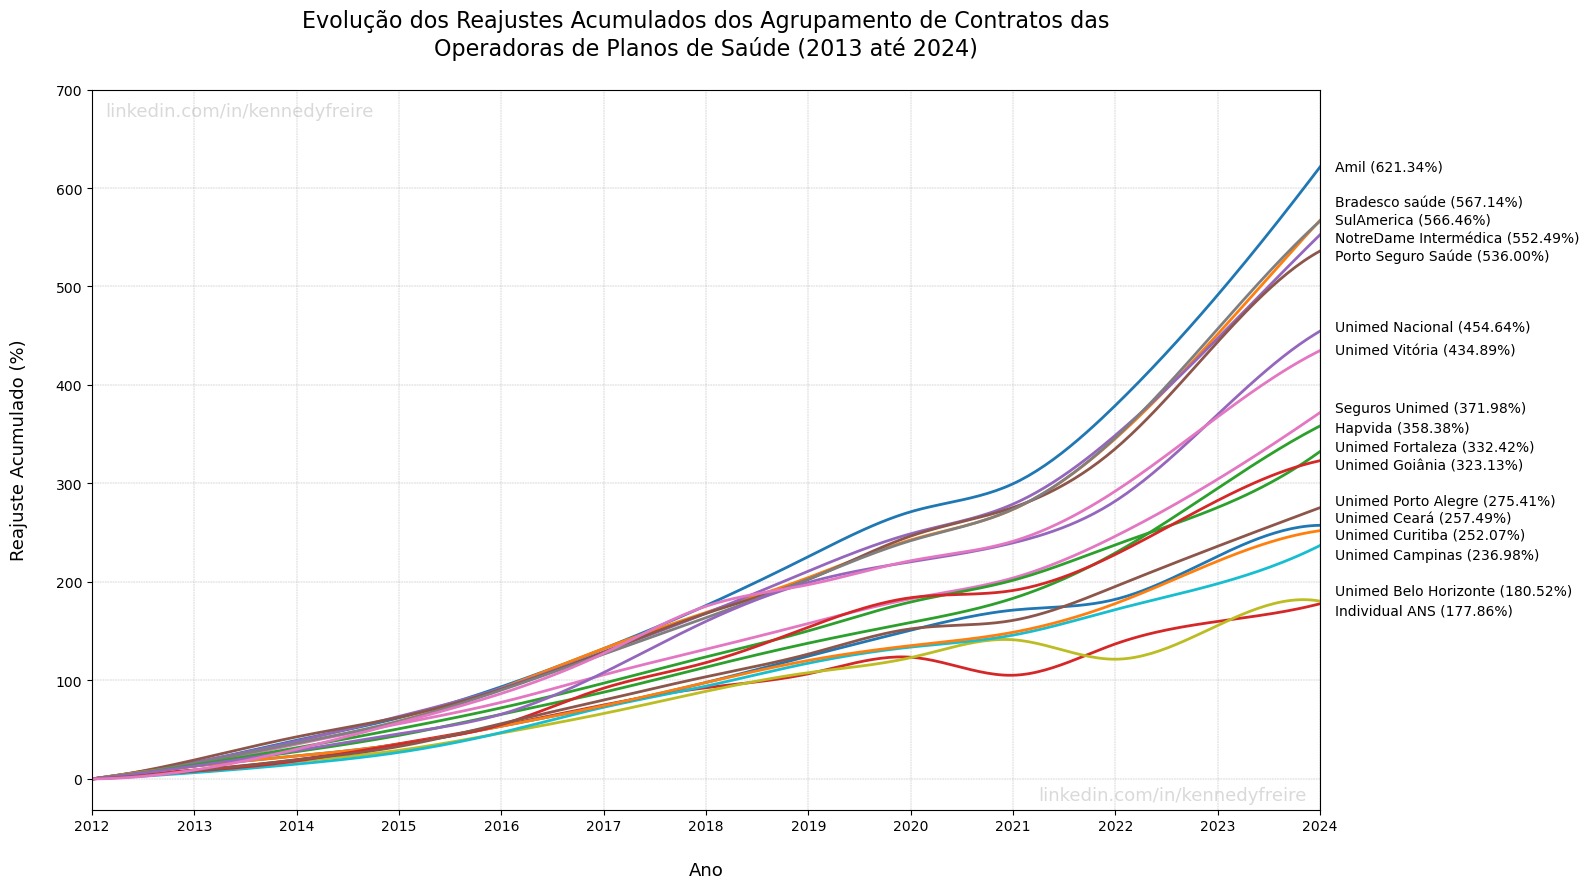

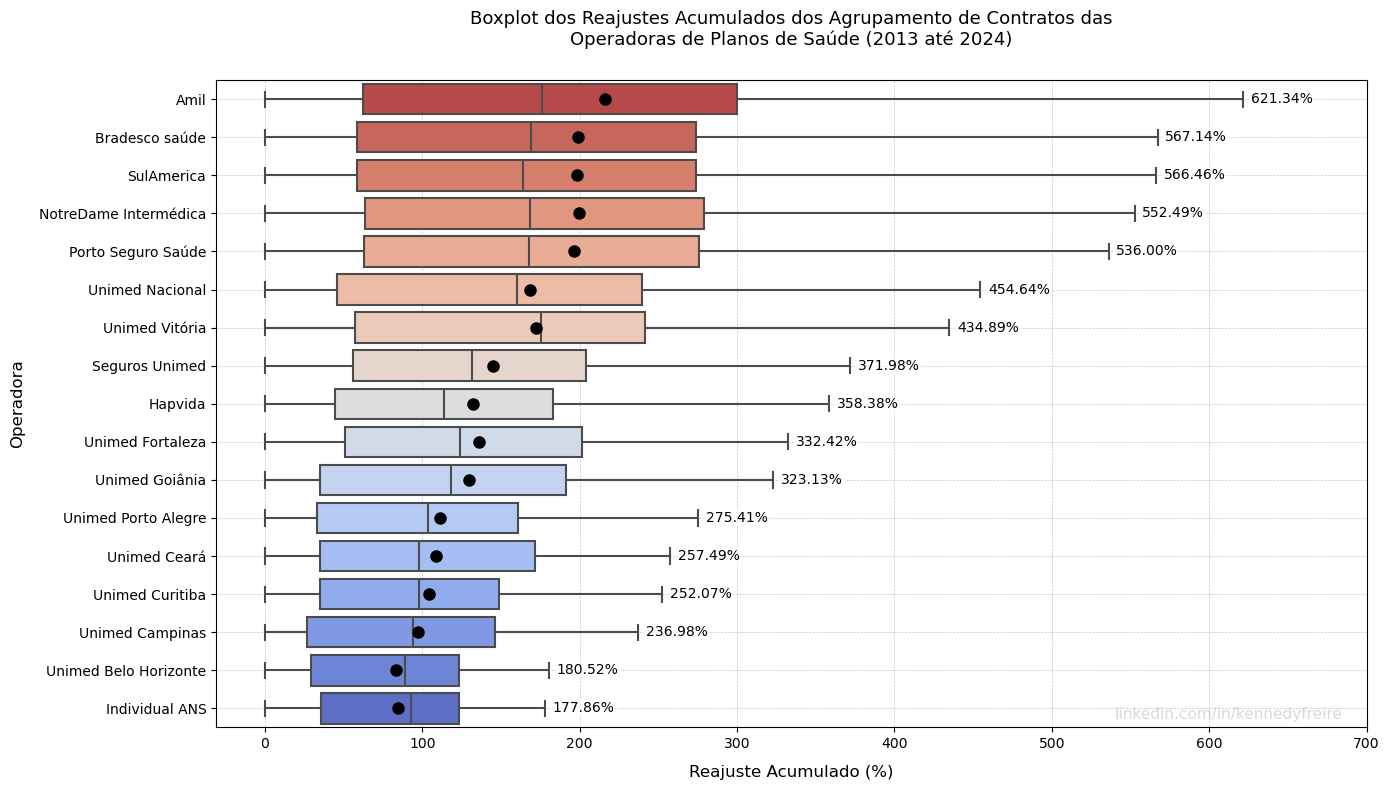

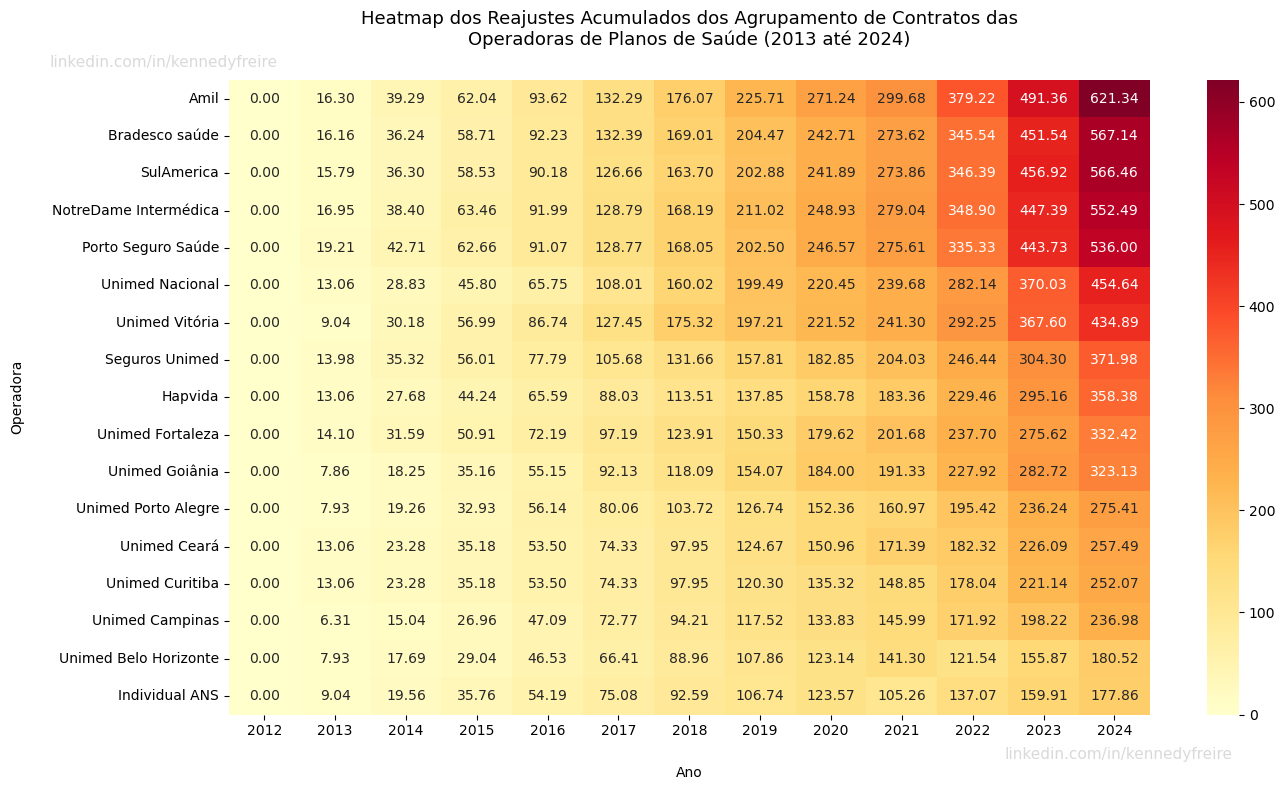

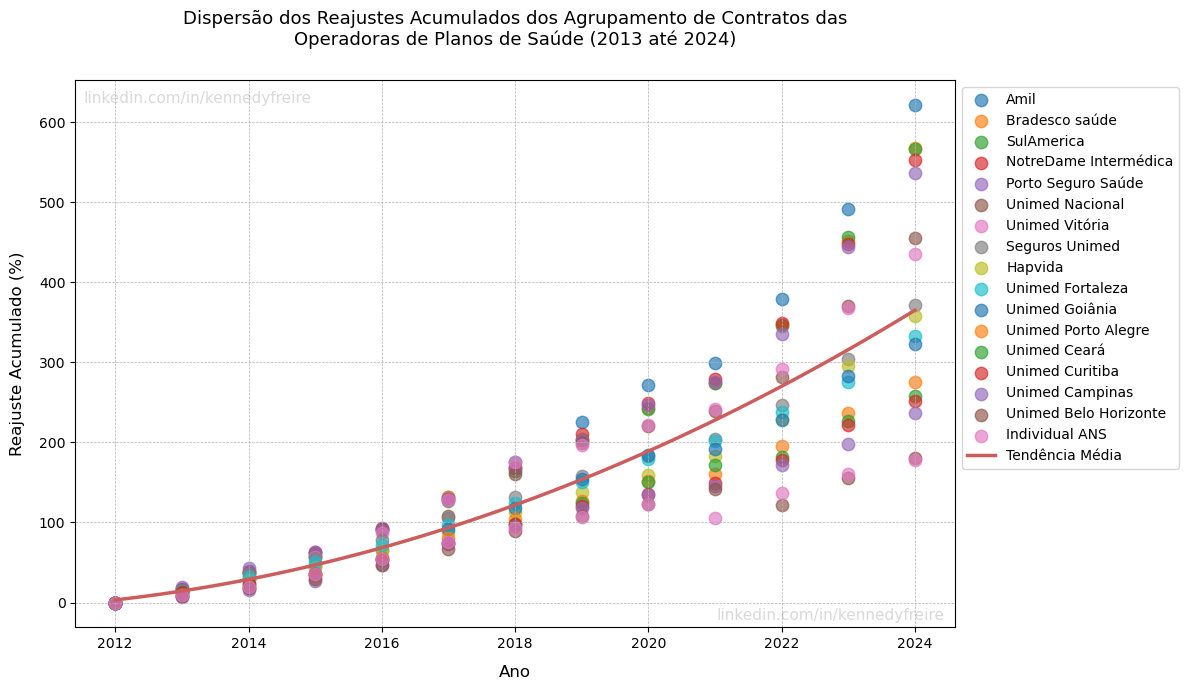

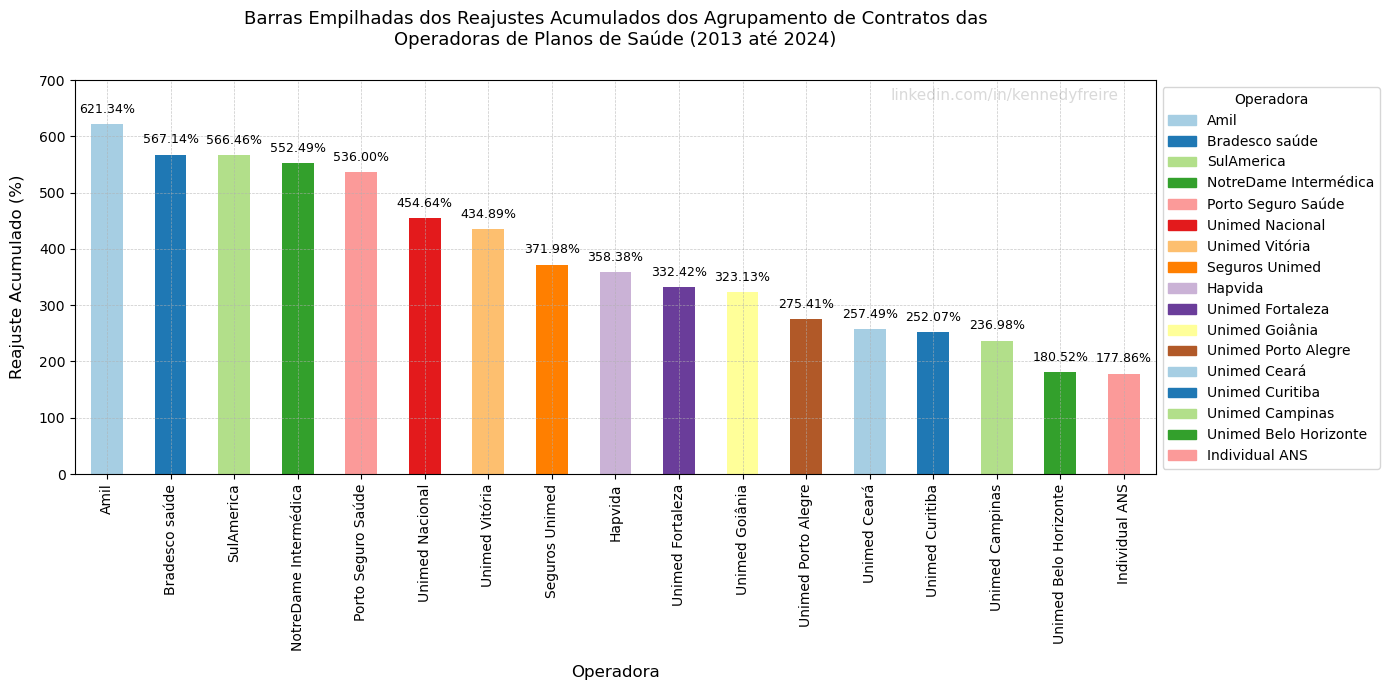

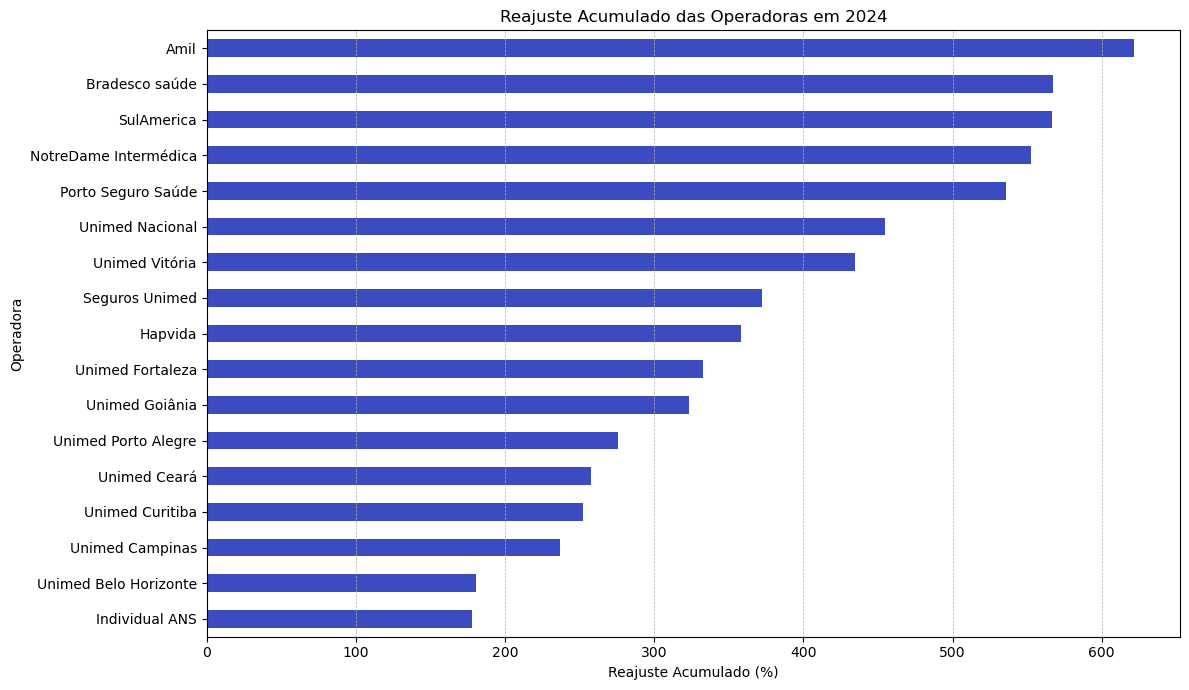

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Carregar dados
df = pd.read_csv('plot_reajuste_pool_base.csv', sep=';', decimal=',', encoding='ISO-8859-1')

# Preparação dos dados
df_melted = df.melt(id_vars='Operadora', var_name='Ano', value_name='Reajuste')
df_melted['Reajuste'] = df_melted['Reajuste'].str.replace('%', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df_melted['Ano'] = df_melted['Ano'].astype(int)

df_final = df_melted.pivot(index='Ano', columns='Operadora', values='Reajuste')

fig, ax = plt.subplots(figsize=(16, 9))

anos = df_final.index.values
anos_smooth = np.linspace(anos.min(), anos.max(), 300)

ajuste_vertical = {
    'Amil': 0,
    'Bradesco saúde': 18,
    'SulAmerica': 2,
    'NotreDame Intermédica': -4,
    'Porto Seguro Saúde': -5,
    'Unimed Nacional': 5,
    'Unimed Vitória': 0,
    'Seguros Unimed': 5,
    'Hapvida': -2,
    'Unimed Fortaleza': 5,
    'Unimed Goiânia': -5,
    'Unimed Porto Alegre': 7,
    'Unimed Ceará': 7,
    'Unimed Curitiba': -4,
    'Unimed Campinas': -10,
    'Unimed Belo Horizonte': 11,
    'Individual ANS': -7
}

deslocamento_horizontal = 0.15

# Plotar linhas e legendas
for coluna in df_final.columns:
    spl = make_interp_spline(anos, df_final[coluna].values, k=3)
    reajuste_smooth = spl(anos_smooth)
    ax.plot(anos_smooth, reajuste_smooth, linewidth=2)

    percentual_final = df_final[coluna].iloc[-1]
    texto_legenda = f"{coluna} ({percentual_final:.2f}%)"

    ax.text(
        anos_smooth[-1] + deslocamento_horizontal,
        reajuste_smooth[-1] + ajuste_vertical.get(coluna, 0),
        texto_legenda,
        fontsize=10,
        va='center',
        ha='left',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1.5)
    )

# Exibir todos os anos no eixo X com margem
ax.set_xticks(anos)
ax.set_xticklabels(anos, rotation=0)
ax.margins(x=0.02, y=0.05)


# Ajuste do título principal com quebra de linha e margens superior e inferior
ax.set_title('Evolução dos Reajustes Acumulados dos Agrupamento de Contratos das\nOperadoras de Planos de Saúde (2013 até 2024)', fontsize=16, pad=25)

# Ajuste das margens nos títulos dos eixos
ax.set_xlabel('Ano', fontsize=13, labelpad=20)
ax.set_ylabel('Reajuste Acumulado (%)', fontsize=13, labelpad=20)

ax.grid(True, linestyle='--', linewidth=0.35)

# Ajuste limite superior do eixo Y
ax.set_ylim(top=700)

# Ajuste extra horizontal para não aparecer linha tracejada após 2024
ax.set_xlim(anos.min(), 2024)

# Adicionar marca d'água
texto_agua = "linkedin.com/in/kennedyfreire"

plt.text(0.88, 0.02, texto_agua, fontsize=13, color='dimgray',
         alpha=0.25, ha='center', va='center', rotation=0,
         transform=ax.transAxes)

plt.text(0.12, 0.97, texto_agua, fontsize=13, color='dimgray',
         alpha=0.25, ha='center', va='center', rotation=0,
         transform=ax.transAxes)
plt.tight_layout()
plt.show()






#Gráfico de Caixas (Boxplot)
# Garantir que o índice está no formato correto (anos como inteiros)
df_final.index = df_final.index.astype(int)

# Verificar se o ano 2024 está no DataFrame e ordenar corretamente
if 2024 in df_final.index:
    df_ordenado = df_final.T.sort_values(by=2024, ascending=False)
else:
    print("Ano 2024 não encontrado no DataFrame. Ordenação baseada no último ano disponível.")
    df_ordenado = df_final.T.sort_values(by=df_final.index[-1], ascending=False)

# Criar a figura e eixo
plt.figure(figsize=(14, 8))

# Criar o boxplot com melhorias visuais e operadoras ordenadas pelo maior reajuste em 2024
ax = sns.boxplot(data=df_ordenado.T, orient='h', palette='coolwarm_r', linewidth=1.5, showmeans=True,
                 meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": "8"})

# Ajustes no gráfico
plt.title('Boxplot dos Reajustes Acumulados dos Agrupamento de Contratos das\nOperadoras de Planos de Saúde (2013 até 2024)', fontsize=13, pad=25)
plt.xlabel('Reajuste Acumulado (%)', fontsize=12, labelpad=10)
plt.ylabel('Operadora', fontsize=12, labelpad=10)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Atualizar os rótulos do eixo Y com as operadoras ordenadas
plt.yticks(ticks=range(len(df_ordenado.index)), labels=df_ordenado.index, fontsize=10)

# Ajuste limite superior do eixo Y
ax.set_xlim(right=700)

# Adicionar o percentual máximo como legenda no gráfico
for i, operadora in enumerate(df_ordenado.index):
    max_valor = df_ordenado.loc[operadora].max()
    plt.text(max_valor + 5, i, f"{max_valor:.2f}%", fontsize=10, verticalalignment='center', horizontalalignment='left',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1.5))
# Adicionar marca d'água
texto_agua = "linkedin.com/in/kennedyfreire"

plt.text(0.88, 0.02, texto_agua, fontsize=11, color='dimgray',
         alpha=0.25, ha='center', va='center', rotation=0,
         transform=ax.transAxes)
# Exibir o gráfico
plt.tight_layout()
plt.show()






#Heatmap (Mapa de Calor)
import seaborn as sns
# Ordenar operadoras com base no reajuste acumulado mais recente (2024)
df_ordenado = df_final.T.sort_values(by=2024, ascending=False)
# Criar o heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df_ordenado, annot=True, fmt=".2f", cmap="YlOrRd")
# Ajustes no gráfico
plt.title('Heatmap dos Reajustes Acumulados dos Agrupamento de Contratos das\nOperadoras de Planos de Saúde (2013 até 2024)', fontsize=13, pad=25)
plt.xlabel('Ano', labelpad=20)
plt.ylabel('Operadora', labelpad=20)
plt.tight_layout()
# Adicionar marca d'água
texto_agua = "linkedin.com/in/kennedyfreire"

plt.text(0.78, -0.05, texto_agua, fontsize=11, color='dimgray',
         alpha=0.25, ha='center', va='center', rotation=0,
         transform=ax.transAxes)

plt.text(-0.05, 1.02, texto_agua, fontsize=11, color='dimgray',
         alpha=0.25, ha='center', va='center', rotation=0,
         transform=ax.transAxes)
# Exibir o gráfico
plt.show()






#Gráfico de Dispersão (Scatter Plot)
# Garantir que o índice está no formato correto (anos como inteiros)
df_final.index = df_final.index.astype(int)

# Ordenar operadoras com base no reajuste acumulado mais recente (2024)
if 2024 in df_final.index:
    df_ordenado = df_final.T.sort_values(by=2024, ascending=False).T
else:
    print("Ano 2024 não encontrado no DataFrame. Ordenação baseada no último ano disponível.")
    df_ordenado = df_final.T.sort_values(by=df_final.index[-1], ascending=False).T

# Criar a figura do scatter plot
plt.figure(figsize=(12, 7))

# Plotar os pontos de dispersão para cada operadora ordenada
for coluna in df_ordenado.columns:
    plt.scatter(df_ordenado.index, df_ordenado[coluna], label=coluna, s=80, alpha=0.66)

# Calcular a média dos reajustes acumulados para cada ano
media_reajuste = df_ordenado.mean(axis=1)

# Ajustar uma linha de tendência (polinômio de grau 2 para suavização)
coeficientes = np.polyfit(df_ordenado.index, media_reajuste, 2)
polinomio = np.poly1d(coeficientes)

# Criar os valores ajustados para a linha de tendência
anos_tendencia = np.linspace(df_ordenado.index.min(), df_ordenado.index.max(), 100)
valores_tendencia = polinomio(anos_tendencia)

# Plotar a linha de tendência média
plt.plot(anos_tendencia, valores_tendencia, linestyle='-', linewidth=2.5, color='indianred', label='Tendência Média')

# Ajustes no gráfico
plt.title('Dispersão dos Reajustes Acumulados dos Agrupamento de Contratos das\nOperadoras de Planos de Saúde (2013 até 2024)', fontsize=13, pad=25)
plt.ylabel('Reajuste Acumulado (%)', fontsize=12, labelpad=10)
plt.xlabel('Ano', fontsize=12, labelpad=10)
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
texto_agua = "linkedin.com/in/kennedyfreire"

plt.text(0.53, 0.01, texto_agua, fontsize=11, color='dimgray',
         alpha=0.25, ha='center', va='center', rotation=0,
         transform=ax.transAxes)

plt.text(-0.02, 0.81, texto_agua, fontsize=11, color='dimgray',
         alpha=0.25, ha='center', va='center', rotation=0,
         transform=ax.transAxes)
plt.tight_layout()
plt.show()







#Gráfico de Barras Empilhadas
# Garantir que o índice está no formato correto (anos como inteiros)
df_final.index = df_final.index.astype(int)

# Verificar se o ano 2024 está disponível e ordenar baseado nele
if 2024 in df_final.index:
    df_2024 = df_final.loc[2024].sort_values(ascending=False)  # Pegar apenas os valores de 2024 e ordenar
else:
    print("Ano 2024 não encontrado no DataFrame. Utilizando o último ano disponível.")
    df_2024 = df_final.loc[df_final.index[-1]].sort_values(ascending=False)  # Último ano disponível

# Criar a figura para o gráfico de barras
fig, ax = plt.subplots(figsize=(14, 7))

# Criar o gráfico de barras com a paleta de cores "Paired"
cores = sns.color_palette("Paired", len(df_2024))
df_2024.plot(kind='bar', figsize=(14, 7), color=cores, ax=ax, legend=False)  # Remover legenda automática

# Ajustes no gráfico
plt.title('Barras Empilhadas dos Reajustes Acumulados dos Agrupamento de Contratos das\nOperadoras de Planos de Saúde (2013 até 2024)', fontsize=13, pad=25)
plt.ylabel('Reajuste Acumulado (%)', fontsize=12, labelpad=10)
plt.xlabel('Operadora', fontsize=12, labelpad=10)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Adicionar rótulos no topo das barras com os valores de 2024
for i, (operadora, valor) in enumerate(df_2024.items()):
    plt.text(i, valor + 15, f"{valor:.2f}%", ha='center', fontsize=9, color='black', va='bottom')

# Ajuste limite superior do eixo Y
ax.set_ylim(top=700)

# Criar legenda manual com os nomes das operadoras
from matplotlib.patches import Patch

handles = [Patch(color=cores[i], label=operadora) for i, operadora in enumerate(df_2024.index)]
plt.legend(handles=handles, title='Operadora', loc='upper left', bbox_to_anchor=(1, 1))

plt.text(0.86, 0.96, texto_agua, fontsize=11, color='dimgray',
         alpha=0.25, ha='center', va='center', rotation=0,
         transform=ax.transAxes)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()









#Gráfico de Barras Horizontais
df_final.loc[2024].sort_values().plot(kind='barh', figsize=(12, 7), colormap='coolwarm')
plt.title('Reajuste Acumulado das Operadoras em 2024')
plt.xlabel('Reajuste Acumulado (%)')
plt.ylabel('Operadora')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

